In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesRegressor
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, plot_confusion_matrix
from imblearn.over_sampling import SMOTE

import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
feat_df = pd.read_csv("training_set_features.csv")

In [3]:
feat_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
label_df = pd.read_csv("training_set_labels.csv")
label_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [5]:
df = pd.merge(feat_df, label_df, how='outer', on='respondent_id')
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [6]:
df.shape

(26707, 38)

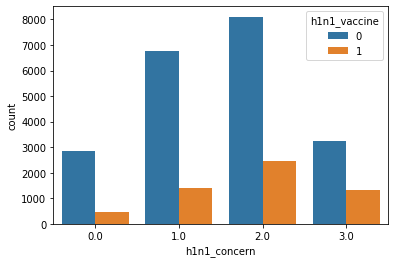

In [31]:
sns.countplot(x='h1n1_concern', hue='h1n1_vaccine', data=df)

In [7]:
df['h1n1_vaccine'].value_counts()/len(df)

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

In [8]:
df['seasonal_vaccine'].value_counts()/len(df)

0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64

In [34]:
df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

For all binary variables: 0 = No; 1 = Yes.

h1n1_concern - Level of concern about the H1N1 flu.
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.

h1n1_knowledge - Level of knowledge about H1N1 flu.
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.

behavioral_antiviral_meds - Has taken antiviral medications. (binary)

behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)

behavioral_face_mask - Has bought a face mask. (binary)

behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)

behavioral_large_gatherings - Has reduced time at large gatherings. (binary)

behavioral_outside_home - Has reduced contact with people outside of own household. (binary)

behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)

doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)

doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)

chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)

child_under_6_months - Has regular close contact with a child under the age of six months. (binary)

health_worker - Is a healthcare worker. (binary)

health_insurance - Has health insurance. (binary)

opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.

1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

age_group - Age group of respondent.

education - Self-reported education level.

race - Race of respondent.

sex - Sex of respondent.

income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.

marital_status - Marital status of respondent.

rent_or_own - Housing situation of respondent.

employment_status - Employment status of respondent.

hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.

census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.

household_adults - Number of other adults in household, top-coded to 3.

household_children - Number of children in household, top-coded to 3.

employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.

employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

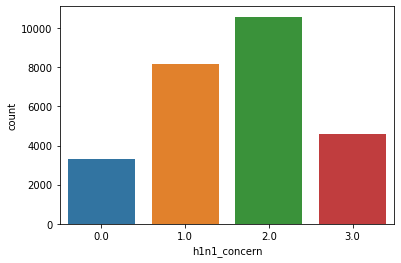

In [51]:
sns.countplot(x='h1n1_concern', data=df)

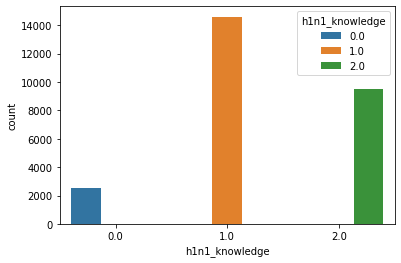

In [52]:
sns.countplot(x='h1n1_knowledge', hue='h1n1_knowledge', data=df)

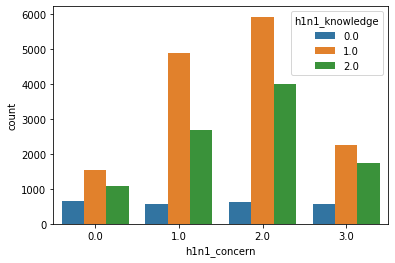

In [9]:
sns.countplot(x='h1n1_concern', hue='h1n1_knowledge', data=df)

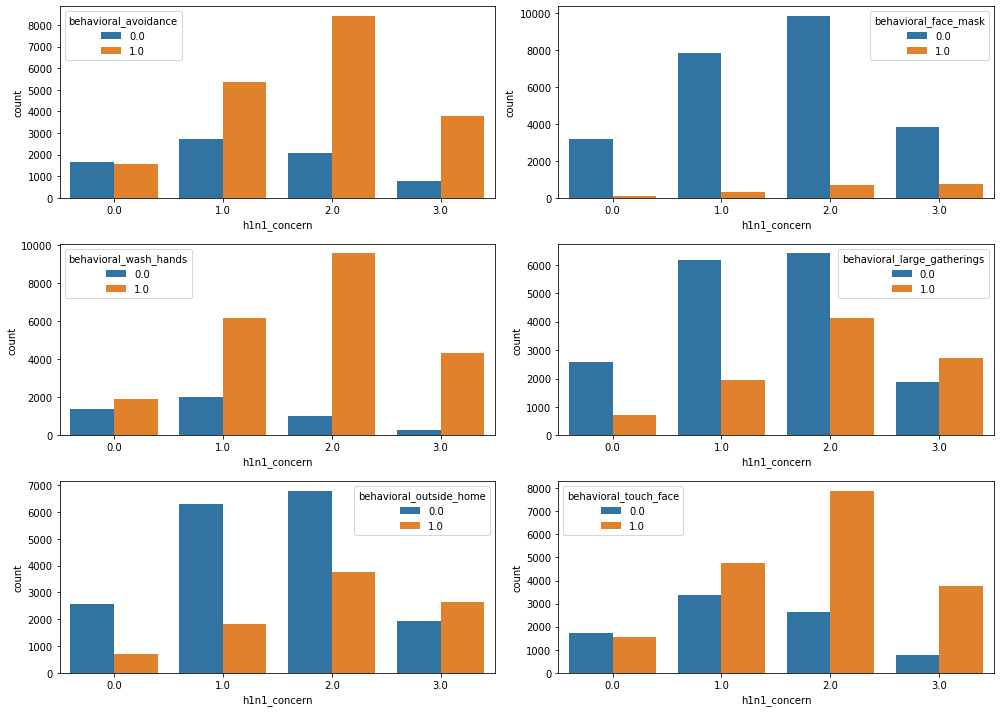

In [20]:
fig, ax = plt.subplots(3, 2, figsize=(14,10))

sns.countplot(x='h1n1_concern', hue='behavioral_avoidance', data=df, ax=ax[0,0])
sns.countplot(x='h1n1_concern', hue='behavioral_face_mask', data=df, ax=ax[0,1])
sns.countplot(x='h1n1_concern', hue='behavioral_wash_hands', data=df, ax=ax[1,0])
sns.countplot(x='h1n1_concern', hue='behavioral_large_gatherings', data=df, ax=ax[1,1])
sns.countplot(x='h1n1_concern', hue='behavioral_outside_home', data=df, ax=ax[2,0])
sns.countplot(x='h1n1_concern', hue='behavioral_touch_face', data=df, ax=ax[2,1])
plt.tight_layout()

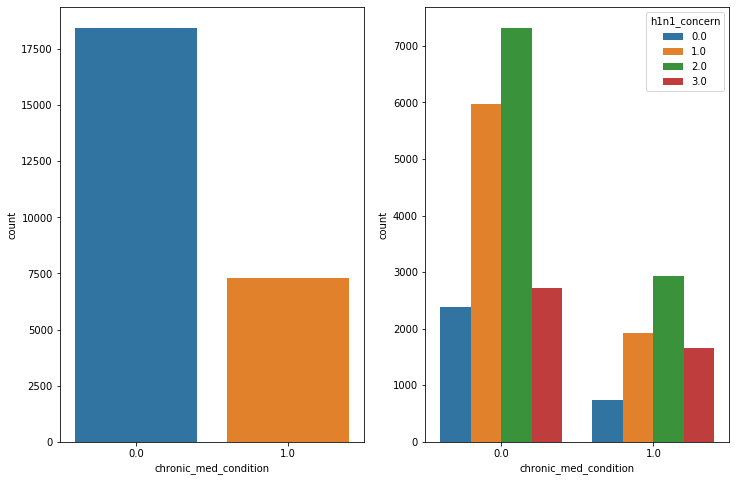

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))
sns.countplot(x='chronic_med_condition', data=df, ax=ax[0])
sns.countplot(x='chronic_med_condition', hue='h1n1_concern', data=df, ax=ax[1])

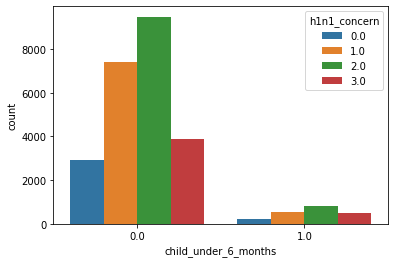

In [26]:
sns.countplot(x='child_under_6_months', hue='h1n1_concern', data=df)

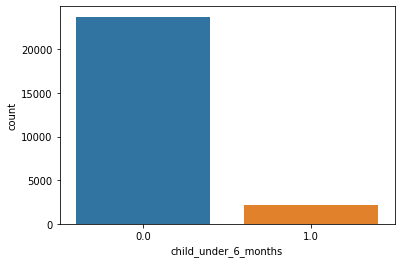

In [27]:
sns.countplot(x='child_under_6_months', data=df)

In [33]:
len(df[(df['child_under_6_months']==1.0) & (df['h1n1_concern']==3.0)])/len(df[(df['child_under_6_months']==1.0) & (df['h1n1_concern']==0.0)])

2.2317596566523603

In [34]:
len(df[(df['child_under_6_months']==0.0) & (df['h1n1_concern']==3.0)])/len(df[(df['child_under_6_months']==0.0) & (df['h1n1_concern']==0.0)])

1.3339058742700103

In [39]:
df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

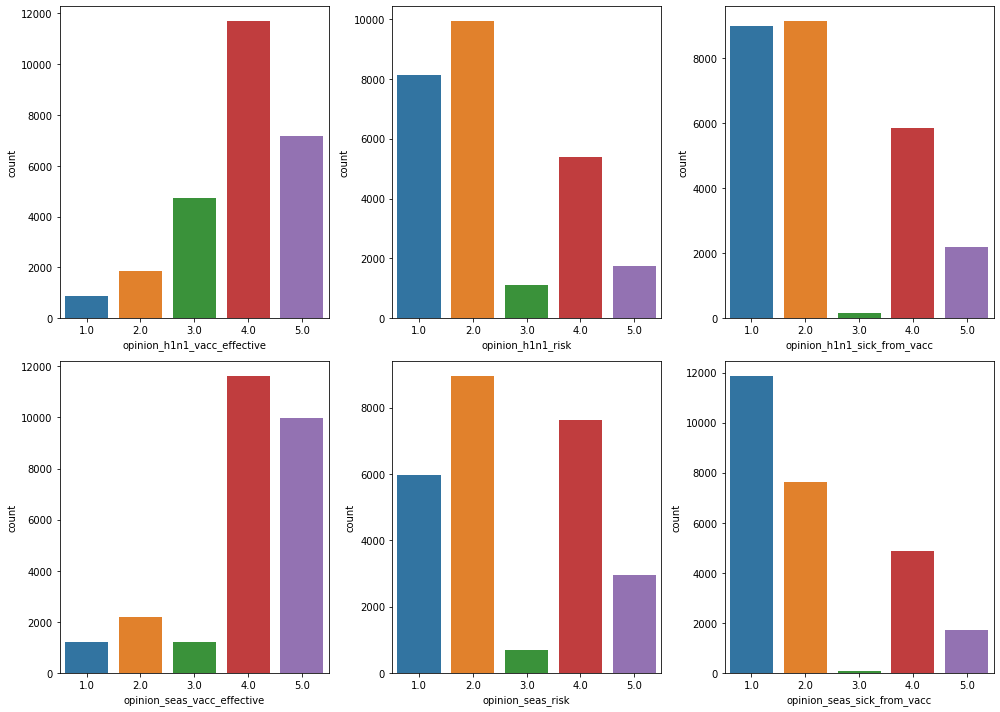

In [41]:
fig, ax = plt.subplots(2, 3, figsize=(14,10))

sns.countplot(x='opinion_h1n1_vacc_effective',  data=df, ax=ax[0,0])
sns.countplot(x='opinion_h1n1_risk', data=df, ax=ax[0,1])
sns.countplot(x='opinion_h1n1_sick_from_vacc', data=df, ax=ax[0,2])
sns.countplot(x='opinion_seas_vacc_effective', data=df, ax=ax[1,0])
sns.countplot(x='opinion_seas_risk', data=df, ax=ax[1,1])
sns.countplot(x='opinion_seas_sick_from_vacc', data=df, ax=ax[1,2])
plt.tight_layout()

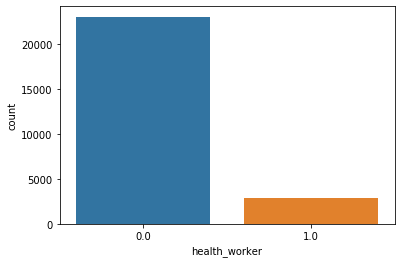

In [42]:
sns.countplot(x='health_worker', data=df)

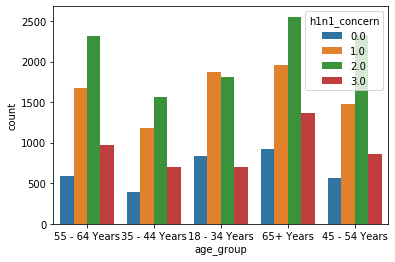

In [44]:
sns.countplot(x='age_group', hue='h1n1_concern', data=df)

In [46]:
df['income_poverty'].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', nan],
      dtype=object)

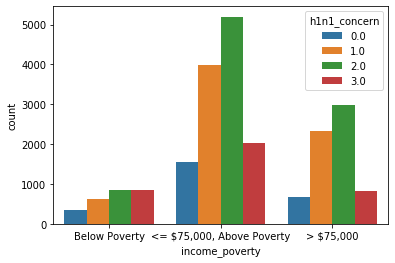

In [47]:
sns.countplot(x='income_poverty', hue='h1n1_concern', data=df)

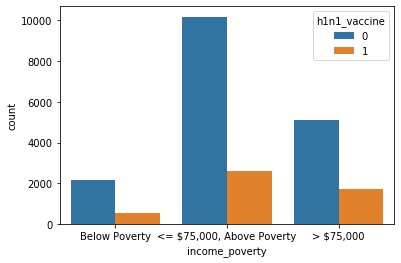

In [48]:
sns.countplot(x='income_poverty', hue='h1n1_vaccine', data=df)

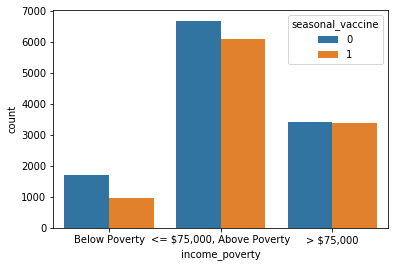

In [49]:
sns.countplot(x='income_poverty', hue='seasonal_vaccine', data=df)

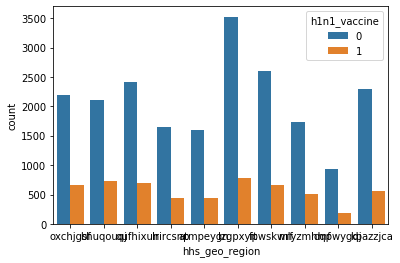

In [50]:
sns.countplot(x='hhs_geo_region', hue='h1n1_vaccine', data=df)

In [53]:
df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

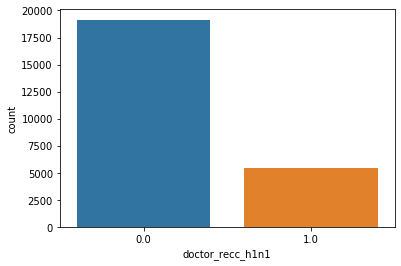

In [54]:
sns.countplot('doctor_recc_h1n1', data=df)

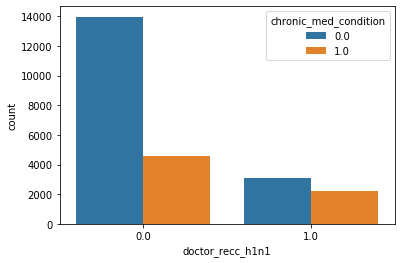

In [55]:
sns.countplot('doctor_recc_h1n1', hue='chronic_med_condition', data=df)

In [56]:
df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [57]:
df.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

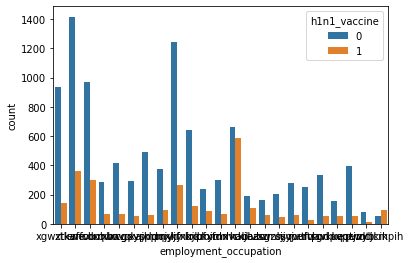

In [89]:
sns.countplot('employment_occupation', hue='h1n1_vaccine', data=df)

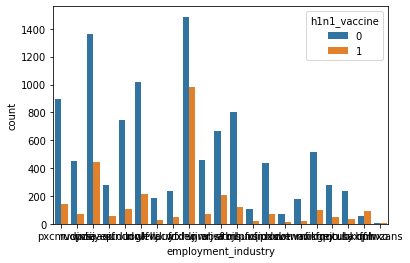

In [90]:
sns.countplot('employment_industry', hue='h1n1_vaccine', data=df)

In [6]:
df.drop(["respondent_id", "employment_occupation", "employment_industry"], axis=1, inplace=True)

In [7]:
X = df.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)

In [8]:
y = df[['h1n1_vaccine', 'seasonal_vaccine']]

In [9]:
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(exclude='object').columns.tolist()

In [18]:
#X.loc[:, cat_cols]

In [10]:
class Imputer(BaseEstimator, TransformerMixin):
    
    """
    
    
    """
    
    def __init__(self, imputer_cat, imputer_num, cat_cols, num_cols):
        
        """
        
        """
        
        self.imputer_cat = imputer_cat
        self.imputer_num = imputer_num
        self.cat_cols = cat_cols
        self.num_cols = num_cols
    
    def fit(self, X, y=None):
        
        """
        
        """
        
        self.imputer_cat.fit(X.loc[:, cat_cols])
        self.imputer_num.fit(X.loc[:, num_cols])
       
        return self
        
    def transform(self, X):
        
        """
        
        
        """
        
        X_cat_imputed = pd.DataFrame(self.imputer_cat.transform(X.loc[:, cat_cols]), columns=cat_cols)
        X_num_imputed = pd.DataFrame(self.imputer_num.transform(X.loc[:, num_cols]), columns=num_cols)
            
        df_imputed = pd.concat([X_cat_imputed, X_num_imputed], axis=1)
        
        return df_imputed

In [11]:
class CreateDummies(BaseEstimator, TransformerMixin):
    
    """
    
    """

    def fit(self, X, y=None):
        """
        
        """
        return self
    
    def transform(self, X):
        """
        
        """
        
        X_encoded = pd.get_dummies(X, drop_first=True)
        return X_encoded

In [12]:
def create_pipeline(imputer_cat, imputer_num, clf, cat_cols, num_cols):
    
    """
    
    """
    pipeline = Pipeline([
                       ('imputer', Imputer(imputer_cat, imputer_num, cat_cols, num_cols)),
                       ('encoder', CreateDummies()),
                       ('normalizer', MinMaxScaler(copy=False)),
                       ('classifier', OneVsRestClassifier(clf))
                        ])
    return pipeline

In [23]:
def build_model(pipeline, param_grid, X_train, y_train):
    
    """
    
    """

    grid_cv = GridSearchCV(pipeline, param_grid=param_grid, cv=3, verbose=1)
    grid_cv.fit(X_train, y_train)
    
    return grid_cv

In [24]:
def model_eval(model, X_test, y_test):
    
    """
    
    
    """
    
    model_pred = model.predict_proba(X_test)
    
    model_score = roc_auc_score(y_true=y_test, y_score=model_pred, average='weighted')
    
    return model_score

In [14]:
imputer_algos = [SimpleImputer(copy=False), KNNImputer(copy=False), IterativeImputer()]

clf_algos = [LogisticRegression(class_weight='balanced'), KNeighborsClassifier(), 
             RandomForestClassifier(class_weight='balanced'), AdaBoostClassifier(), 
             GradientBoostingClassifier(), XGBClassifier()]

lr_simple_param_grid = {
                 'imputer__imputer_num__strategy': ['median', 'most_frequent'],
                 'classifier__estimator__C': [0.05, 0.1, 0.5]}

lr_knn_param_grid = {
                 'imputer__imputer_num__n_neighbors': [5, 10, 15, 20],
                 'classifier__estimator__C': [0.05, 0.1, 0.5]}

lr_iter_param_grid = {
                 'imputer__imputer_num__estimator': [BayesianRidge(), ExtraTreesRegressor()],
                 'classifier__estimator__C': [0.05, 0.1, 0.5]}

knn_simple_param_grid = {
                 'imputer__imputer_num__strategy': ['median', 'most_frequent'],
                 'classifier__estimator__n_neighbors': [10, 30, 50, 70]}

knn_knn_param_grid = {
                 'imputer__imputer_num__n_neighbors': [5, 10, 15, 20],
                 'classifier__estimator__n_neighbors': [10, 30, 50, 70]}

knn_iter_param_grid = {
                 'imputer__imputer_num__estimator': [BayesianRidge(), ExtraTreesRegressor()],
                 'classifier__estimator__n_neighbors': [10, 30, 50, 70]}


rf_simple_param_grid = {
                 'imputer__imputer_num__strategy': ['median', 'most_frequent'],
                 'classifier__estimator__n_estimators': [50, 80, 110, 150],
                 'classifier__estimator__criterion': ['gini', 'entropy']}

rf_knn_param_grid = {
                 'imputer__imputer_num__n_neighbors': [5, 10, 15, 20],
                 'classifier__estimator__n_estimators': [50, 80, 110, 150],
                 'classifier__estimator__criterion': ['gini', 'entropy']}

rf_iter_param_grid = {
                 'imputer__imputer_num__estimator': [BayesianRidge(), ExtraTreesRegressor()],
                 'classifier__estimator__n_estimators': [50, 80, 110, 150],
                 'classifier__estimator__criterion': ['gini', 'entropy']}

ada_simple_param_grid = {
                 'imputer__imputer_num__strategy': ['median', 'most_frequent'],
                 'classifier__estimator__n_estimators': [50, 80, 110, 150],
                 'classifier__estimator__learning_rate': [0.001, 0.01, 0.05, 0.1]}

ada_knn_param_grid = {
                 'imputer__imputer_num__n_neighbors': [5, 10, 15, 20],
                 'classifier__estimator__n_estimators': [50, 80, 110, 150],
                 'classifier__estimator__learning_rate': [0.001, 0.01, 0.05, 0.1]}

ada_iter_param_grid = {
                 'imputer__imputer_num__estimator': [BayesianRidge(), ExtraTreesRegressor()],
                 'classifier__estimator__n_estimators': [50, 80, 110, 150],
                 'classifier__estimator__learning_rate': [0.001, 0.01, 0.05, 0.1]}


grad_simple_param_grid = {
                 'imputer__imputer_num__strategy': ['median', 'most_frequent'],
                 'classifier__estimator__n_estimators': [100, 120, 140, 160],
                 'classifier__estimator__learning_rate': [0.001, 0.01, 0.05, 0.1]}

grad_knn_param_grid = {
                 'imputer__imputer_num__n_neighbors': [5, 10, 15, 20],
                 'classifier__estimator__n_estimators': [100, 120, 140, 160],
                 'classifier__estimator__learning_rate': [0.001, 0.01, 0.05, 0.1]}

grad_iter_param_grid = {
                 'imputer__imputer_num__estimator': [BayesianRidge(), ExtraTreesRegressor()],
                 'classifier__estimator__n_estimators': [100, 120, 140, 160],
                 'classifier__estimator__learning_rate': [0.001, 0.01, 0.05, 0.1]}

xgb_simple_param_grid = {
                 'imputer__imputer_num__strategy': ['median', 'most_frequent'],
                 'classifier__estimator__learning_rate': [0.001, 0.01, 0.05, 0.1]}

xgb_knn_param_grid = {
                 'imputer__imputer_num__n_neighbors': [5, 10, 15, 20],
                 'classifier__estimator__learning_rate': [0.001, 0.01, 0.05, 0.1]}

xgb_iter_param_grid = {
                 'imputer__imputer_num__estimator': [BayesianRidge(), ExtraTreesRegressor()],
                 'classifier__estimator__learning_rate': [0.001, 0.01, 0.05, 0.1]}

lr_param_grid = [lr_simple_param_grid, lr_knn_param_grid, lr_iter_param_grid]
knn_param_grid = [knn_simple_param_grid, knn_knn_param_grid, knn_iter_param_grid]
rf_param_grid = [rf_simple_param_grid, rf_knn_param_grid, rf_iter_param_grid]
ada_param_grid = [ada_simple_param_grid, ada_knn_param_grid, ada_iter_param_grid]
grad_param_grid = [grad_simple_param_grid, grad_knn_param_grid, grad_iter_param_grid]
xgb_param_grid = [xgb_simple_param_grid, xgb_knn_param_grid, xgb_iter_param_grid]

#param_grid_list = [lr_param_grid, knn_param_grid, rf_param_grid, ada_param_grid, grad_param_grid, xgb_param_grid]
param_grid_list = [lr_simple_param_grid, knn_simple_param_grid, rf_simple_param_grid, ada_simple_param_grid, 
                   grad_simple_param_grid, xgb_simple_param_grid]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
X_train.shape, X_test.shape, y_train.shape

((21365, 33), (5342, 33), (21365, 2))

In [77]:
y_train.head()

,h1n1_vaccine,seasonal_vaccine
11020,0,1
21390,0,0
7986,0,1
2280,0,0
9025,0,0


In [78]:
X_train.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
11020,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,White,Male,"> $75,000",Married,Own,Employed,oxchjgsf,"MSA, Principle City",1.0,0.0
21390,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Rent,Not in Labor Force,lzgpxyit,"MSA, Not Principle City",1.0,0.0
7986,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lzgpxyit,"MSA, Not Principle City",1.0,0.0
2280,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,kbazzjca,Non-MSA,1.0,1.0
9025,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Other or Multiple,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,kbazzjca,"MSA, Not Principle City",0.0,0.0


In [25]:
y_train['h1n1_vaccine'].value_counts()/len(y_train) *100

0    78.792418
1    21.207582
Name: h1n1_vaccine, dtype: float64

In [19]:
y_test['h1n1_vaccine'].value_counts()/len(y_test) *100

0    78.509921
1    21.490079
Name: h1n1_vaccine, dtype: float64

In [21]:
imputer_cat = SimpleImputer(strategy='most_frequent', copy=False)
imputer_num = SimpleImputer(copy=False)

for clf, param_grid in zip(clf_algos, param_grid_list):
    
    initial_time = time.time()
    pipeline = create_pipeline(imputer_cat=imputer_cat, imputer_num=imputer_num, clf=clf, 
                               cat_cols=cat_cols, num_cols=num_cols)
    print("fitting the model {}".format(clf))
    model = build_model(pipeline=pipeline, param_grid=param_grid, X_train=X_train, y_train=y_train)
    elapsed_time = time.time() - initial_time
    print('fitting done in {} sec!'.format(elapsed_time))
    print("the best parameter set is : {}".format(model.best_params_))
  
    print('evaluating the model')
    model_train_score = model_eval(model, X_train, y_train)
    model_test_score = model_eval(model, X_test, y_test)
    print("the train set score is {}".format(model_train_score))
    print("the test set score is {}".format(model_test_score))
    print()

fitting the model LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] classifier__estimator__C=0.05, imputer__imputer_num__strategy=median 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  classifier__estimator__C=0.05, imputer__imputer_num__strategy=median, total=   0.9s
[CV] classifier__estimator__C=0.05, imputer__imputer_num__strategy=median 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  classifier__estimator__C=0.05, imputer__imputer_num__strategy=median, total=   0.7s
[CV] classifier__estimator__C=0.05, imputer__imputer_num__strategy=median 
[CV]  classifier__estimator__C=0.05, imputer__imputer_num__strategy=median, total=   0.7s
[CV] classifier__estimator__C=0.05, imputer__imputer_num__strategy=most_frequent 
[CV]  classifier__estimator__C=0.05, imputer__imputer_num__strategy=most_frequent, total=   0.7s
[CV] classifier__estimator__C=0.05, imputer__imputer_num__strategy=most_frequent 
[CV]  classifier__estimator__C=0.05, imputer__imputer_num__strategy=most_frequent, total=   0.7s
[CV] classifier__estimator__C=0.05, imputer__imputer_num__strategy=most_frequent 
[CV]  classifier__estimator__C=0.05, imputer__imputer_num__strategy=most_frequent, total=   0.7s
[CV] classifier__estimator__C=0.1, imputer__imputer_num__strategy=median 
[CV]  classifier__estimator__C=0.1, imputer__imputer_num__strategy=median, total=   0.7s
[CV] classifier__estimator__C=0.1, imputer__i

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   13.1s finished


fitting done in 14.34826946258545 sec!
the best parameter set is : {'classifier__estimator__C': 0.1, 'imputer__imputer_num__strategy': 'most_frequent'}
evaluating the model
the train set score is 0.8443637178613069
the test set score is 0.8476077548155719

fitting the model KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] classifier__estimator__n_neighbors=10, imputer__imputer_num__strategy=median 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  classifier__estimator__n_neighbors=10, imputer__imputer_num__strategy=median, total=  17.3s
[CV] classifier__estimator__n_neighbors=10, imputer__imputer_num__strategy=median 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.3s remaining:    0.0s


[CV]  classifier__estimator__n_neighbors=10, imputer__imputer_num__strategy=median, total=  16.6s
[CV] classifier__estimator__n_neighbors=10, imputer__imputer_num__strategy=median 
[CV]  classifier__estimator__n_neighbors=10, imputer__imputer_num__strategy=median, total=  16.3s
[CV] classifier__estimator__n_neighbors=10, imputer__imputer_num__strategy=most_frequent 
[CV]  classifier__estimator__n_neighbors=10, imputer__imputer_num__strategy=most_frequent, total=  16.2s
[CV] classifier__estimator__n_neighbors=10, imputer__imputer_num__strategy=most_frequent 
[CV]  classifier__estimator__n_neighbors=10, imputer__imputer_num__strategy=most_frequent, total=  16.2s
[CV] classifier__estimator__n_neighbors=10, imputer__imputer_num__strategy=most_frequent 
[CV]  classifier__estimator__n_neighbors=10, imputer__imputer_num__strategy=most_frequent, total=  15.8s
[CV] classifier__estimator__n_neighbors=30, imputer__imputer_num__strategy=median 
[CV]  classifier__estimator__n_neighbors=30, imputer_

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  6.6min finished


fitting done in 399.6303687095642 sec!
the best parameter set is : {'classifier__estimator__n_neighbors': 30, 'imputer__imputer_num__strategy': 'most_frequent'}
evaluating the model
the train set score is 0.8280002651105431
the test set score is 0.7966860422769263

fitting the model RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] classifier__estimator__criterion=gini, classifier__estimator__n_estimators=50, imputer__imputer_n

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  classifier__estimator__criterion=gini, classifier__estimator__n_estimators=50, imputer__imputer_num__strategy=median, total=   1.8s
[CV] classifier__estimator__criterion=gini, classifier__estimator__n_estimators=50, imputer__imputer_num__strategy=median 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  classifier__estimator__criterion=gini, classifier__estimator__n_estimators=50, imputer__imputer_num__strategy=median, total=   1.8s
[CV] classifier__estimator__criterion=gini, classifier__estimator__n_estimators=50, imputer__imputer_num__strategy=median 
[CV]  classifier__estimator__criterion=gini, classifier__estimator__n_estimators=50, imputer__imputer_num__strategy=median, total=   1.8s
[CV] classifier__estimator__criterion=gini, classifier__estimator__n_estimators=50, imputer__imputer_num__strategy=most_frequent 
[CV]  classifier__estimator__criterion=gini, classifier__estimator__n_estimators=50, imputer__imputer_num__strategy=most_frequent, total=   1.8s
[CV] classifier__estimator__criterion=gini, classifier__estimator__n_estimators=50, imputer__imputer_num__strategy=most_frequent 
[CV]  classifier__estimator__criterion=gini, classifier__estimator__n_estimators=50, imputer__imputer_num__strategy=most_frequent, total=   1.8s
[CV] classifier__estimator__criterion=gini, classif

[CV]  classifier__estimator__criterion=entropy, classifier__estimator__n_estimators=80, imputer__imputer_num__strategy=median, total=   2.9s
[CV] classifier__estimator__criterion=entropy, classifier__estimator__n_estimators=80, imputer__imputer_num__strategy=most_frequent 
[CV]  classifier__estimator__criterion=entropy, classifier__estimator__n_estimators=80, imputer__imputer_num__strategy=most_frequent, total=   3.8s
[CV] classifier__estimator__criterion=entropy, classifier__estimator__n_estimators=80, imputer__imputer_num__strategy=most_frequent 
[CV]  classifier__estimator__criterion=entropy, classifier__estimator__n_estimators=80, imputer__imputer_num__strategy=most_frequent, total=   3.3s
[CV] classifier__estimator__criterion=entropy, classifier__estimator__n_estimators=80, imputer__imputer_num__strategy=most_frequent 
[CV]  classifier__estimator__criterion=entropy, classifier__estimator__n_estimators=80, imputer__imputer_num__strategy=most_frequent, total=   2.9s
[CV] classifier_

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  2.8min finished


fitting done in 174.06631994247437 sec!
the best parameter set is : {'classifier__estimator__criterion': 'entropy', 'classifier__estimator__n_estimators': 110, 'imputer__imputer_num__strategy': 'median'}
evaluating the model
the train set score is 1.0
the test set score is 0.8456335913759109

fitting the model AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] classifier__estimator__learning_rate=0.001, classifier__estimator__n_estimators=50, imputer__imputer_num__strategy=median 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  classifier__estimator__learning_rate=0.001, classifier__estimator__n_estimators=50, imputer__imputer_num__strategy=median, total=   1.8s
[CV] classifier__estimator__learning_rate=0.001, classifier__estimator__n_estimators=50, imputer__imputer_num__strategy=median 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  classifier__estimator__learning_rate=0.001, classifier__estimator__n_estimators=50, imputer__imputer_num__strategy=median, total=   1.6s
[CV] classifier__estimator__learning_rate=0.001, classifier__estimator__n_estimators=50, imputer__imputer_num__strategy=median 
[CV]  classifier__estimator__learning_rate=0.001, classifier__estimator__n_estimators=50, imputer__imputer_num__strategy=median, total=   1.6s
[CV] classifier__estimator__learning_rate=0.001, classifier__estimator__n_estimators=50, imputer__imputer_num__strategy=most_frequent 
[CV]  classifier__estimator__learning_rate=0.001, classifier__estimator__n_estimators=50, imputer__imputer_num__strategy=most_frequent, total=   1.6s
[CV] classifier__estimator__learning_rate=0.001, classifier__estimator__n_estimators=50, imputer__imputer_num__strategy=most_frequent 
[CV]  classifier__estimator__learning_rate=0.001, classifier__estimator__n_estimators=50, imputer__imputer_num__strategy=most_frequent, total=   1.6s
[CV] classifier_

[CV]  classifier__estimator__learning_rate=0.01, classifier__estimator__n_estimators=80, imputer__imputer_num__strategy=median, total=   2.3s
[CV] classifier__estimator__learning_rate=0.01, classifier__estimator__n_estimators=80, imputer__imputer_num__strategy=median 
[CV]  classifier__estimator__learning_rate=0.01, classifier__estimator__n_estimators=80, imputer__imputer_num__strategy=median, total=   2.3s
[CV] classifier__estimator__learning_rate=0.01, classifier__estimator__n_estimators=80, imputer__imputer_num__strategy=most_frequent 
[CV]  classifier__estimator__learning_rate=0.01, classifier__estimator__n_estimators=80, imputer__imputer_num__strategy=most_frequent, total=   2.3s
[CV] classifier__estimator__learning_rate=0.01, classifier__estimator__n_estimators=80, imputer__imputer_num__strategy=most_frequent 
[CV]  classifier__estimator__learning_rate=0.01, classifier__estimator__n_estimators=80, imputer__imputer_num__strategy=most_frequent, total=   2.3s
[CV] classifier__estima

[CV]  classifier__estimator__learning_rate=0.05, classifier__estimator__n_estimators=110, imputer__imputer_num__strategy=median, total=   3.9s
[CV] classifier__estimator__learning_rate=0.05, classifier__estimator__n_estimators=110, imputer__imputer_num__strategy=median 
[CV]  classifier__estimator__learning_rate=0.05, classifier__estimator__n_estimators=110, imputer__imputer_num__strategy=median, total=   3.0s
[CV] classifier__estimator__learning_rate=0.05, classifier__estimator__n_estimators=110, imputer__imputer_num__strategy=most_frequent 
[CV]  classifier__estimator__learning_rate=0.05, classifier__estimator__n_estimators=110, imputer__imputer_num__strategy=most_frequent, total=   3.0s
[CV] classifier__estimator__learning_rate=0.05, classifier__estimator__n_estimators=110, imputer__imputer_num__strategy=most_frequent 
[CV]  classifier__estimator__learning_rate=0.05, classifier__estimator__n_estimators=110, imputer__imputer_num__strategy=most_frequent, total=   3.0s
[CV] classifier_

[CV]  classifier__estimator__learning_rate=0.1, classifier__estimator__n_estimators=150, imputer__imputer_num__strategy=median, total=   3.9s
[CV] classifier__estimator__learning_rate=0.1, classifier__estimator__n_estimators=150, imputer__imputer_num__strategy=median 
[CV]  classifier__estimator__learning_rate=0.1, classifier__estimator__n_estimators=150, imputer__imputer_num__strategy=median, total=   3.9s
[CV] classifier__estimator__learning_rate=0.1, classifier__estimator__n_estimators=150, imputer__imputer_num__strategy=most_frequent 
[CV]  classifier__estimator__learning_rate=0.1, classifier__estimator__n_estimators=150, imputer__imputer_num__strategy=most_frequent, total=   3.9s
[CV] classifier__estimator__learning_rate=0.1, classifier__estimator__n_estimators=150, imputer__imputer_num__strategy=most_frequent 
[CV]  classifier__estimator__learning_rate=0.1, classifier__estimator__n_estimators=150, imputer__imputer_num__strategy=most_frequent, total=   3.9s
[CV] classifier__estima

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:  4.4min finished


fitting done in 268.9996621608734 sec!
the best parameter set is : {'classifier__estimator__learning_rate': 0.1, 'classifier__estimator__n_estimators': 150, 'imputer__imputer_num__strategy': 'most_frequent'}
evaluating the model
the train set score is 0.8415628336095095
the test set score is 0.8454502479786262

fitting the model GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  classifier__estimator__learning_rate=0.001, classifier__estimator__n_estimators=100, imputer__imputer_num__strategy=median, total=   3.9s
[CV] classifier__estimator__learning_rate=0.001, classifier__estimator__n_estimators=100, imputer__imputer_num__strategy=median 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


[CV]  classifier__estimator__learning_rate=0.001, classifier__estimator__n_estimators=100, imputer__imputer_num__strategy=median, total=   3.9s
[CV] classifier__estimator__learning_rate=0.001, classifier__estimator__n_estimators=100, imputer__imputer_num__strategy=median 
[CV]  classifier__estimator__learning_rate=0.001, classifier__estimator__n_estimators=100, imputer__imputer_num__strategy=median, total=   3.9s
[CV] classifier__estimator__learning_rate=0.001, classifier__estimator__n_estimators=100, imputer__imputer_num__strategy=most_frequent 
[CV]  classifier__estimator__learning_rate=0.001, classifier__estimator__n_estimators=100, imputer__imputer_num__strategy=most_frequent, total=   3.9s
[CV] classifier__estimator__learning_rate=0.001, classifier__estimator__n_estimators=100, imputer__imputer_num__strategy=most_frequent 
[CV]  classifier__estimator__learning_rate=0.001, classifier__estimator__n_estimators=100, imputer__imputer_num__strategy=most_frequent, total=   3.9s
[CV] clas

[CV]  classifier__estimator__learning_rate=0.01, classifier__estimator__n_estimators=120, imputer__imputer_num__strategy=median, total=   4.6s
[CV] classifier__estimator__learning_rate=0.01, classifier__estimator__n_estimators=120, imputer__imputer_num__strategy=median 
[CV]  classifier__estimator__learning_rate=0.01, classifier__estimator__n_estimators=120, imputer__imputer_num__strategy=median, total=   4.6s
[CV] classifier__estimator__learning_rate=0.01, classifier__estimator__n_estimators=120, imputer__imputer_num__strategy=most_frequent 
[CV]  classifier__estimator__learning_rate=0.01, classifier__estimator__n_estimators=120, imputer__imputer_num__strategy=most_frequent, total=   4.6s
[CV] classifier__estimator__learning_rate=0.01, classifier__estimator__n_estimators=120, imputer__imputer_num__strategy=most_frequent 
[CV]  classifier__estimator__learning_rate=0.01, classifier__estimator__n_estimators=120, imputer__imputer_num__strategy=most_frequent, total=   4.6s
[CV] classifier_

[CV]  classifier__estimator__learning_rate=0.05, classifier__estimator__n_estimators=140, imputer__imputer_num__strategy=median, total=   5.2s
[CV] classifier__estimator__learning_rate=0.05, classifier__estimator__n_estimators=140, imputer__imputer_num__strategy=median 
[CV]  classifier__estimator__learning_rate=0.05, classifier__estimator__n_estimators=140, imputer__imputer_num__strategy=median, total=   5.3s
[CV] classifier__estimator__learning_rate=0.05, classifier__estimator__n_estimators=140, imputer__imputer_num__strategy=most_frequent 
[CV]  classifier__estimator__learning_rate=0.05, classifier__estimator__n_estimators=140, imputer__imputer_num__strategy=most_frequent, total=   5.3s
[CV] classifier__estimator__learning_rate=0.05, classifier__estimator__n_estimators=140, imputer__imputer_num__strategy=most_frequent 
[CV]  classifier__estimator__learning_rate=0.05, classifier__estimator__n_estimators=140, imputer__imputer_num__strategy=most_frequent, total=   5.2s
[CV] classifier_

[CV]  classifier__estimator__learning_rate=0.1, classifier__estimator__n_estimators=160, imputer__imputer_num__strategy=median, total=   5.9s
[CV] classifier__estimator__learning_rate=0.1, classifier__estimator__n_estimators=160, imputer__imputer_num__strategy=median 
[CV]  classifier__estimator__learning_rate=0.1, classifier__estimator__n_estimators=160, imputer__imputer_num__strategy=median, total=   5.9s
[CV] classifier__estimator__learning_rate=0.1, classifier__estimator__n_estimators=160, imputer__imputer_num__strategy=most_frequent 
[CV]  classifier__estimator__learning_rate=0.1, classifier__estimator__n_estimators=160, imputer__imputer_num__strategy=most_frequent, total=   5.9s
[CV] classifier__estimator__learning_rate=0.1, classifier__estimator__n_estimators=160, imputer__imputer_num__strategy=most_frequent 
[CV]  classifier__estimator__learning_rate=0.1, classifier__estimator__n_estimators=160, imputer__imputer_num__strategy=most_frequent, total=   5.9s
[CV] classifier__estima

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:  7.9min finished


fitting done in 478.30499720573425 sec!
the best parameter set is : {'classifier__estimator__learning_rate': 0.1, 'classifier__estimator__n_estimators': 120, 'imputer__imputer_num__strategy': 'most_frequent'}
evaluating the model
the train set score is 0.8585896553117143
the test set score is 0.8539479021327984

fitting the model XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)
Fitting

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  classifier__estimator__learning_rate=0.001, imputer__imputer_num__strategy=median, total=   2.0s
[CV] classifier__estimator__learning_rate=0.001, imputer__imputer_num__strategy=median 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  classifier__estimator__learning_rate=0.001, imputer__imputer_num__strategy=median, total=   1.9s
[CV] classifier__estimator__learning_rate=0.001, imputer__imputer_num__strategy=median 
[CV]  classifier__estimator__learning_rate=0.001, imputer__imputer_num__strategy=median, total=   1.9s
[CV] classifier__estimator__learning_rate=0.001, imputer__imputer_num__strategy=most_frequent 
[CV]  classifier__estimator__learning_rate=0.001, imputer__imputer_num__strategy=most_frequent, total=   1.9s
[CV] classifier__estimator__learning_rate=0.001, imputer__imputer_num__strategy=most_frequent 
[CV]  classifier__estimator__learning_rate=0.001, imputer__imputer_num__strategy=most_frequent, total=   2.1s
[CV] classifier__estimator__learning_rate=0.001, imputer__imputer_num__strategy=most_frequent 
[CV]  classifier__estimator__learning_rate=0.001, imputer__imputer_num__strategy=most_frequent, total=   2.3s
[CV] classifier__estimator__learning_rate=0.01, imputer__imputer_num__strategy=median 
[CV]

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   53.7s finished


fitting done in 57.28032612800598 sec!
the best parameter set is : {'classifier__estimator__learning_rate': 0.05, 'imputer__imputer_num__strategy': 'most_frequent'}
evaluating the model
the train set score is 0.8816279317625122
the test set score is 0.854943127690487



In [17]:
batch_size = 5000
n_batch = int(len(X_train)/batch_size)
n_batch

4

In [18]:
def create_pipeline_batch(imputer_cat, imputer_num, cat_cols, num_cols):
    
    """
    
    """
    pipeline = Pipeline([
                       ('imputer', Imputer(imputer_cat, imputer_num, cat_cols, num_cols)),
                       ('encoder', CreateDummies()),
                       ('normalizer', MinMaxScaler(copy=False))
                       ])
    return pipeline

In [19]:
def batch_preprocessing(imputer_cat, imputer_num, cat_cols, num_cols, X_train, X_test, batch_size):
    
    """
    
    
    """
    X_train_final = []
    
    for start, end in zip(range(0, len(X_train), batch_size), range(batch_size, len(X_train), batch_size)):
        X_train_batch = X_train.iloc[start:end, :]
        pipeline = create_pipeline_batch(imputer_cat=imputer_cat, imputer_num=imputer_num, 
                                 cat_cols=cat_cols, num_cols=num_cols)   
        X_train_batch_final = pipeline.fit_transform(X_train_batch)
        X_train_final.append(X_train_batch_final)
        
    X_train_final = pd.DataFrame(np.row_stack(X_train_final)) 
        
    X_test_final = pipeline.transform(X_test)
    X_test_final = pd.DataFrame(np.row_stack(X_test_final)) 
        
    return X_train_final, X_test_final

In [20]:
def model_compile(clf_algo, param_grid, X_train, y_train, X_test, y_test):
    
    """
    
    """
    
    clf = OneVsRestClassifier(clf_algo)
    initial_time = time.time()
    print("fitting the model {}".format(clf))
    model = build_model(pipeline=clf, param_grid=param_grid, X_train=X_train, 
                        y_train=y_train.iloc[:len(X_train), :])
    elapsed_time = time.time() - initial_time
    print('fitting done in {} sec!'.format(elapsed_time))
    print("the best parameter set is : {}".format(model.best_params_))
    
    print('evaluating the model')
    model_train_score = model_eval(model, X_train, y_train.iloc[:len(X_train), :])
    model_test_score = model_eval(model, X_test, y_test.iloc[:len(X_test), :])
    print("the train set score is {}".format(model_train_score))
    print("the test set score is {}".format(model_test_score))
    
    return model_train_score, model_test_score

In [21]:
def result(imputer_cat, impute_num, cat_cols, num_cols, X_train, X_test, batch_size, clf_algo,
           param_grid, y_train, y_test):
    
    """
    
    """
    
    X_train_final, X_test_final = batch_preprocessing(imputer_cat=imputer_cat, imputer_num=imputer_num, 
                                                  cat_cols=cat_cols, num_cols=num_cols, X_train=X_train, 
                                                  X_test=X_test, batch_size=batch_size)
    
    train_score, test_score = model_compile(clf_algo=clf_algo, param_grid=param_grid, X_train=X_train_final,
                                            y_train=y_train,  X_test=X_test_final, y_test=y_test)
    
    return train_score, test_score

In [25]:
imputer_cat = SimpleImputer(strategy='most_frequent', copy=False)
param_dict = [{'estimator__C': [0.05, 0.1, 0.5]}, {'estimator__n_neighbors': [10, 30, 50, 70]},
              {'estimator__n_estimators': [50, 80, 110, 150], 'estimator__criterion': ['gini', 'entropy']},
              {'estimator__n_estimators': [50, 80, 110, 150], 'estimator__learning_rate': [0.001, 0.01, 0.05, 0.1]},
              {'estimator__n_estimators': [100, 120, 140, 160], 'estimator__learning_rate': [0.001, 0.01, 0.05, 0.1]},
              {'estimator__learning_rate': [0.001, 0.01, 0.05, 0.1]}]

score_dict = {}

for i in range(5, 65, 10):
    print("running for n_neighbors={}".format(i))
    imputer_num = KNNImputer(n_neighbors=i, copy=False)
    for clf_algo, param_grid in zip(clf_algos, param_dict):
        print("running the model : {}".format(clf_algo))
        print("running for the parameter set : {}".format(param_grid))
            
        train_score, test_score = result(imputer_cat=imputer_cat, impute_num=imputer_num, cat_cols=cat_cols, 
                                         num_cols=num_cols, X_train=X_train, X_test=X_test, batch_size=batch_size, 
                                         clf_algo=clf_algo, param_grid=param_grid, y_train=y_train, y_test=y_test)
        if train_score > max_train_Score:
            score_dict[str(clf_algo).split("(")[0]] = [train_score, test_score]
            max_train_Score = score_dict[str(clf_algo).split("(")[0]][0]
            
    print()
print()    

running the model : LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
running for the parameter set : {'estimator__C': [0.05, 0.1, 0.5]}
fitting the model OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                        

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.2s finished


fitting done in 2.5081493854522705 sec!
the best parameter set is : {'estimator__C': 0.1}
evaluating the model
the train set score is 0.8453941022449042
the test set score is 0.8391075549269307
running the model : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
running for the parameter set : {'estimator__n_neighbors': [10, 30, 50, 70]}
fitting the model OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform'),
                    n_jobs=None)
Fitting 3 folds for each of 4 candidates

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  2.7min finished


fitting done in 161.81171417236328 sec!
the best parameter set is : {'estimator__n_neighbors': 50}
evaluating the model
the train set score is 0.8220945835722409
the test set score is 0.7938934139785396
running the model : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
running for the parameter set : {'estimator__n_estimators': [50, 80, 110, 150], 'estimator__criterion': ['gini', 'entropy']}
fitting the model OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True,
            

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  1.1min finished


fitting done in 70.53002738952637 sec!
the best parameter set is : {'estimator__criterion': 'entropy', 'estimator__n_estimators': 110}
evaluating the model
the train set score is 1.0
the test set score is 0.8435735146347181
running the model : AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
running for the parameter set : {'estimator__n_estimators': [50, 80, 110, 150], 'estimator__learning_rate': [0.001, 0.01, 0.05, 0.1]}
fitting the model OneVsRestClassifier(estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=None,
                                                 learning_rate=1.0,
                                                 n_estimators=50,
                                                 random_state=None),
                    n_jobs=None)
Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.7min finished


fitting done in 105.16852164268494 sec!
the best parameter set is : {'estimator__learning_rate': 0.1, 'estimator__n_estimators': 150}
evaluating the model
the train set score is 0.8463807501383116
the test set score is 0.842860078689025
running the model : GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
running for the parameter set : {'estimator__n

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  3.4min finished


fitting done in 212.2419023513794 sec!
the best parameter set is : {'estimator__learning_rate': 0.1, 'estimator__n_estimators': 160}
evaluating the model
the train set score is 0.8686763180484118
the test set score is 0.8524283110567559
running the model : XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)
running for the parameter set : {'estimator__learning_rate': [0.001, 0.01, 0.05, 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   20.4s finished


fitting done in 22.853673458099365 sec!
the best parameter set is : {'estimator__learning_rate': 0.05}
evaluating the model
the train set score is 0.8910657375593215
the test set score is 0.8521288325724093

running the model : LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
running for the parameter set : {'estimator__C': [0.05, 0.1, 0.5]}
fitting the model OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                             

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.7s finished


fitting done in 2.034419298171997 sec!
the best parameter set is : {'estimator__C': 0.05}
evaluating the model
the train set score is 0.8453599768190005
the test set score is 0.8396336397087303
running the model : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
running for the parameter set : {'estimator__n_neighbors': [10, 30, 50, 70]}
fitting the model OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform'),
                    n_jobs=None)
Fitting 3 folds for each of 4 candidates

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  2.6min finished


fitting done in 157.7218599319458 sec!
the best parameter set is : {'estimator__n_neighbors': 30}
evaluating the model
the train set score is 0.8284241330322382
the test set score is 0.7905304916279176
running the model : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
running for the parameter set : {'estimator__n_estimators': [50, 80, 110, 150], 'estimator__criterion': ['gini', 'entropy']}
fitting the model OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True,
             

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  1.1min finished


fitting done in 71.7787766456604 sec!
the best parameter set is : {'estimator__criterion': 'entropy', 'estimator__n_estimators': 150}
evaluating the model
the train set score is 1.0
the test set score is 0.8487554752756407
running the model : AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
running for the parameter set : {'estimator__n_estimators': [50, 80, 110, 150], 'estimator__learning_rate': [0.001, 0.01, 0.05, 0.1]}
fitting the model OneVsRestClassifier(estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=None,
                                                 learning_rate=1.0,
                                                 n_estimators=50,
                                                 random_state=None),
                    n_jobs=None)
Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.7min finished


fitting done in 106.95809745788574 sec!
the best parameter set is : {'estimator__learning_rate': 0.1, 'estimator__n_estimators': 150}
evaluating the model
the train set score is 0.8491666734467662
the test set score is 0.8476065855460154
running the model : GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
running for the parameter set : {'estimator__

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  3.5min finished


fitting done in 215.78547620773315 sec!
the best parameter set is : {'estimator__learning_rate': 0.1, 'estimator__n_estimators': 120}
evaluating the model
the train set score is 0.8682604782684958
the test set score is 0.8557911991554182
running the model : XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)
running for the parameter set : {'estimator__learning_rate': [0.001, 0.01, 0.05, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   19.6s finished


fitting done in 22.029448986053467 sec!
the best parameter set is : {'estimator__learning_rate': 0.05}
evaluating the model
the train set score is 0.8934552782428724
the test set score is 0.8561272717420015

running the model : LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
running for the parameter set : {'estimator__C': [0.05, 0.1, 0.5]}
fitting the model OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                             

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.7s finished


fitting done in 1.967515230178833 sec!
the best parameter set is : {'estimator__C': 0.05}
evaluating the model
the train set score is 0.845408232877319
the test set score is 0.8395224389556954
running the model : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
running for the parameter set : {'estimator__n_neighbors': [10, 30, 50, 70]}
fitting the model OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform'),
                    n_jobs=None)
Fitting 3 folds for each of 4 candidates,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  2.7min finished


fitting done in 160.63388562202454 sec!
the best parameter set is : {'estimator__n_neighbors': 30}
evaluating the model
the train set score is 0.8287578423465665
the test set score is 0.7901799439553984
running the model : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
running for the parameter set : {'estimator__n_estimators': [50, 80, 110, 150], 'estimator__criterion': ['gini', 'entropy']}
fitting the model OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True,
            

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  1.1min finished


fitting done in 70.1502013206482 sec!
the best parameter set is : {'estimator__criterion': 'entropy', 'estimator__n_estimators': 110}
evaluating the model
the train set score is 1.0
the test set score is 0.8493905754316251
running the model : AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
running for the parameter set : {'estimator__n_estimators': [50, 80, 110, 150], 'estimator__learning_rate': [0.001, 0.01, 0.05, 0.1]}
fitting the model OneVsRestClassifier(estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=None,
                                                 learning_rate=1.0,
                                                 n_estimators=50,
                                                 random_state=None),
                    n_jobs=None)
Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.7min finished


fitting done in 106.14197826385498 sec!
the best parameter set is : {'estimator__learning_rate': 0.1, 'estimator__n_estimators': 150}
evaluating the model
the train set score is 0.8509957362489529
the test set score is 0.8496090445358887
running the model : GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
running for the parameter set : {'estimator__

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  3.5min finished


fitting done in 219.51541233062744 sec!
the best parameter set is : {'estimator__learning_rate': 0.1, 'estimator__n_estimators': 140}
evaluating the model
the train set score is 0.8720739383379675
the test set score is 0.8587670962225469
running the model : XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)
running for the parameter set : {'estimator__learning_rate': [0.001, 0.01, 0.05, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   19.5s finished


fitting done in 21.977300882339478 sec!
the best parameter set is : {'estimator__learning_rate': 0.05}
evaluating the model
the train set score is 0.8951749739982643
the test set score is 0.858192140674848

running the model : LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
running for the parameter set : {'estimator__C': [0.05, 0.1, 0.5]}
fitting the model OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                              

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.7s finished


fitting done in 2.0004310607910156 sec!
the best parameter set is : {'estimator__C': 0.5}
evaluating the model
the train set score is 0.8457528781706772
the test set score is 0.8397783456599612
running the model : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
running for the parameter set : {'estimator__n_neighbors': [10, 30, 50, 70]}
fitting the model OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform'),
                    n_jobs=None)
Fitting 3 folds for each of 4 candidates

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  2.6min finished


fitting done in 156.5972023010254 sec!
the best parameter set is : {'estimator__n_neighbors': 30}
evaluating the model
the train set score is 0.8285294363327285
the test set score is 0.7904517243327069
running the model : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
running for the parameter set : {'estimator__n_estimators': [50, 80, 110, 150], 'estimator__criterion': ['gini', 'entropy']}
fitting the model OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True,
             

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  1.1min finished


fitting done in 70.80187654495239 sec!
the best parameter set is : {'estimator__criterion': 'gini', 'estimator__n_estimators': 150}
evaluating the model
the train set score is 1.0
the test set score is 0.851084583791888
running the model : AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
running for the parameter set : {'estimator__n_estimators': [50, 80, 110, 150], 'estimator__learning_rate': [0.001, 0.01, 0.05, 0.1]}
fitting the model OneVsRestClassifier(estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=None,
                                                 learning_rate=1.0,
                                                 n_estimators=50,
                                                 random_state=None),
                    n_jobs=None)
Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.7min finished


fitting done in 106.764564037323 sec!
the best parameter set is : {'estimator__learning_rate': 0.1, 'estimator__n_estimators': 150}
evaluating the model
the train set score is 0.851644697328772
the test set score is 0.8500602288957858
running the model : GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
running for the parameter set : {'estimator__n_e

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  3.5min finished


fitting done in 219.89872574806213 sec!
the best parameter set is : {'estimator__learning_rate': 0.1, 'estimator__n_estimators': 140}
evaluating the model
the train set score is 0.8727969932768225
the test set score is 0.8594737703469404
running the model : XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)
running for the parameter set : {'estimator__learning_rate': [0.001, 0.01, 0.05, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   21.3s finished


fitting done in 23.730172157287598 sec!
the best parameter set is : {'estimator__learning_rate': 0.1}
evaluating the model
the train set score is 0.9181050489454313
the test set score is 0.8588772072096825

running the model : LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
running for the parameter set : {'estimator__C': [0.05, 0.1, 0.5]}
fitting the model OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                              

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.7s finished


fitting done in 1.971111536026001 sec!
the best parameter set is : {'estimator__C': 0.5}
evaluating the model
the train set score is 0.8458676552593641
the test set score is 0.8397000305252224
running the model : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
running for the parameter set : {'estimator__n_neighbors': [10, 30, 50, 70]}
fitting the model OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform'),
                    n_jobs=None)
Fitting 3 folds for each of 4 candidates,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  2.7min finished


fitting done in 164.2252902984619 sec!
the best parameter set is : {'estimator__n_neighbors': 30}
evaluating the model
the train set score is 0.828456664857493
the test set score is 0.7899833857262317
running the model : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
running for the parameter set : {'estimator__n_estimators': [50, 80, 110, 150], 'estimator__criterion': ['gini', 'entropy']}
fitting the model OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True,
              

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  1.2min finished


fitting done in 76.4133517742157 sec!
the best parameter set is : {'estimator__criterion': 'entropy', 'estimator__n_estimators': 150}
evaluating the model
the train set score is 1.0
the test set score is 0.8515176107725485
running the model : AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
running for the parameter set : {'estimator__n_estimators': [50, 80, 110, 150], 'estimator__learning_rate': [0.001, 0.01, 0.05, 0.1]}
fitting the model OneVsRestClassifier(estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=None,
                                                 learning_rate=1.0,
                                                 n_estimators=50,
                                                 random_state=None),
                    n_jobs=None)
Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  2.0min finished


fitting done in 129.41976404190063 sec!
the best parameter set is : {'estimator__learning_rate': 0.1, 'estimator__n_estimators': 150}
evaluating the model
the train set score is 0.8522214421880039
the test set score is 0.8498141120936817
running the model : GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
running for the parameter set : {'estimator__

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  3.6min finished


fitting done in 223.363507270813 sec!
the best parameter set is : {'estimator__learning_rate': 0.1, 'estimator__n_estimators': 160}
evaluating the model
the train set score is 0.8748781711931625
the test set score is 0.859744239047166
running the model : XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)
running for the parameter set : {'estimator__learning_rate': [0.001, 0.01, 0.05, 0.1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   19.9s finished


fitting done in 22.397730827331543 sec!
the best parameter set is : {'estimator__learning_rate': 0.05}
evaluating the model
the train set score is 0.8963415069955295
the test set score is 0.8583510435445809

running the model : LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
running for the parameter set : {'estimator__C': [0.05, 0.1, 0.5]}
fitting the model OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                             

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.8s finished


fitting done in 2.1457395553588867 sec!
the best parameter set is : {'estimator__C': 0.05}
evaluating the model
the train set score is 0.845585476751251
the test set score is 0.8394471406228907
running the model : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
running for the parameter set : {'estimator__n_neighbors': [10, 30, 50, 70]}
fitting the model OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform'),
                    n_jobs=None)
Fitting 3 folds for each of 4 candidates

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  2.7min finished


fitting done in 160.00383853912354 sec!
the best parameter set is : {'estimator__n_neighbors': 30}
evaluating the model
the train set score is 0.828691465327747
the test set score is 0.7903777379537689
running the model : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
running for the parameter set : {'estimator__n_estimators': [50, 80, 110, 150], 'estimator__criterion': ['gini', 'entropy']}
fitting the model OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True,
             

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  1.1min finished


fitting done in 72.60905027389526 sec!
the best parameter set is : {'estimator__criterion': 'entropy', 'estimator__n_estimators': 150}
evaluating the model
the train set score is 0.9999999999999999
the test set score is 0.8524081784119565
running the model : AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
running for the parameter set : {'estimator__n_estimators': [50, 80, 110, 150], 'estimator__learning_rate': [0.001, 0.01, 0.05, 0.1]}
fitting the model OneVsRestClassifier(estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=None,
                                                 learning_rate=1.0,
                                                 n_estimators=50,
                                                 random_state=None),
                    n_jobs=None)
Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.7min finished


fitting done in 107.62034106254578 sec!
the best parameter set is : {'estimator__learning_rate': 0.1, 'estimator__n_estimators': 150}
evaluating the model
the train set score is 0.8522216688800442
the test set score is 0.850071122714404
running the model : GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
running for the parameter set : {'estimator__n

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  3.6min finished


fitting done in 223.21990489959717 sec!
the best parameter set is : {'estimator__learning_rate': 0.1, 'estimator__n_estimators': 160}
evaluating the model
the train set score is 0.8749548991345791
the test set score is 0.860567071878523
running the model : XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)
running for the parameter set : {'estimator__learning_rate': [0.001, 0.01, 0.05, 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   19.3s finished


fitting done in 21.771085739135742 sec!
the best parameter set is : {'estimator__learning_rate': 0.05}
evaluating the model
the train set score is 0.8968826618174419
the test set score is 0.8588938329727344




In [48]:
score_dict['LogisticRegression'][0]

0.845585476751251

In [28]:
score_df = pd.DataFrame.from_dict(score_dict, orient='index', columns=['Train_Score', 'Test_score'])

In [46]:
score_df

,Train_Score,Test_score
LogisticRegression,0.845585,0.839447
KNeighborsClassifier,0.828691,0.790378
RandomForestClassifier,1.000000,0.852408
AdaBoostClassifier,0.852222,0.850071
GradientBoostingClassifier,0.874955,0.860567
XGBClassifier,0.896883,0.858894


(array([0., 1., 2., 3., 4., 5.]), <a list of 6 Text xticklabel objects>)

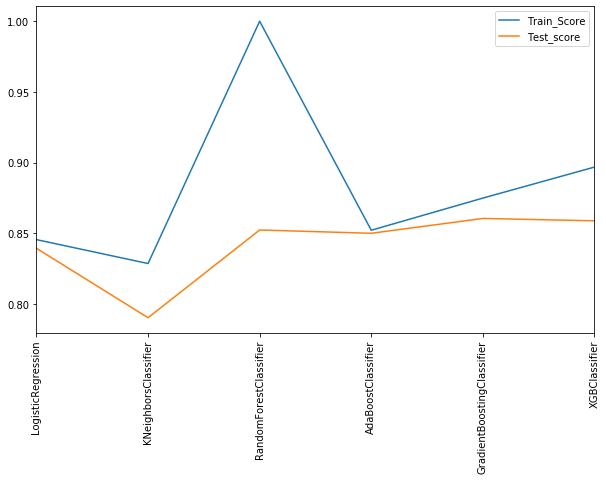

In [44]:
score_df[['Train_Score', 'Test_score']].plot(figsize=(10,6))
plt.xticks(rotation=90)

In [45]:
score_dict['AdaBoostClassifier']

[0.8522216688800442, 0.850071122714404]

In [52]:
#y_test

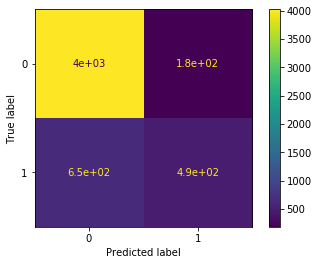

In [58]:
imputer_cat = SimpleImputer(strategy='most_frequent', copy=False)
imputer_num = KNNImputer(n_neighbors=55, copy=False)

model = OneVsRestClassifier(AdaBoostClassifier(n_estimators=150, learning_rate=0.1))
X_train_final, X_test_final = batch_preprocessing(imputer_cat=imputer_cat, imputer_num=imputer_num, 
                                                  cat_cols=cat_cols, num_cols=num_cols, X_train=X_train,
                                                  X_test=X_test, batch_size=batch_size)

model.fit(X_train_final, y_train.iloc[0:20000, [0]])
model_pred = model.predict(X_test_final)

conf_mat = plot_confusion_matrix(model, X_test_final, y_test.iloc[0:20000, [0]])
print(conf_mat)

In [74]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
Dropout()

In [111]:
model = Sequential()

model.add(Dense(28, activation='relu', input_shape=(X_train_final.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(56, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 28)                1456      
_________________________________________________________________
dropout (Dropout)            (None, 28)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 56)                1624      
_________________________________________________________________
dense_41 (Dense)             (None, 2)                 114       
Total params: 3,194
Trainable params: 3,194
Non-trainable params: 0
_________________________________________________________________


In [103]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, mode='min')

In [112]:
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(X_train_final, y_train.iloc[0:20000, :], validation_data=(X_test_final, y_test.iloc[0:20000, :]),
          epochs=50, batch_size=1000, callbacks=[early_stop])

Epoch 1/50
20/20 [==============================] - 0s 7ms/step - loss: 0.7190 - val_loss: 0.6318
Epoch 2/50
20/20 [==============================] - 0s 6ms/step - loss: 0.6113 - val_loss: 0.5897
Epoch 3/50
20/20 [==============================] - 0s 6ms/step - loss: 0.5801 - val_loss: 0.5567
Epoch 4/50
20/20 [==============================] - 0s 6ms/step - loss: 0.5500 - val_loss: 0.5276
Epoch 5/50
20/20 [==============================] - 0s 6ms/step - loss: 0.5295 - val_loss: 0.5084
Epoch 6/50
20/20 [==============================] - 0s 6ms/step - loss: 0.5132 - val_loss: 0.4963
Epoch 7/50
20/20 [==============================] - 0s 6ms/step - loss: 0.5024 - val_loss: 0.4870
Epoch 8/50
20/20 [==============================] - 0s 6ms/step - loss: 0.4945 - val_loss: 0.4810
Epoch 9/50
20/20 [==============================] - 0s 6ms/step - loss: 0.4884 - val_loss: 0.4766
Epoch 10/50
20/20 [==============================] - 0s 6ms/step - loss: 0.4831 - val_loss: 0.4726
Epoch 11/50
20/20 [

In [113]:
model_pred = model.predict(X_test_final)

In [114]:
model_pred

array([[0.03674316, 0.07489148],
       [0.0702655 , 0.11146212],
       [0.03445953, 0.0908398 ],
       ...,
       [0.2777725 , 0.3473661 ],
       [0.1347021 , 0.45694205],
       [0.03874811, 0.2234132 ]], dtype=float32)

In [115]:
model_score = roc_auc_score(y_true=y_test.iloc[0:20000, :], y_score=model_pred, average='weighted')

In [116]:
model_score

0.8352571796461876

In [117]:
roc_auc_score(y_true=y_train.iloc[0:20000, :], y_score=model.predict(X_train_final), average='weighted')

0.8516494015555042